## ADCP and Model spectra plots for joint paper

In [20]:
#from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import warnings
import xarray as xr
import pandas as pd
#import xrft
#import glob
import os
#
from collections import OrderedDict
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes
## from oceans.datasets import etopo_subset
## from oceans.sw_extras import gamma_GP_from_SP_pt
#from matplotlib.patches import Polygon
## import gsw
#from matplotlib import animation, rc
#from IPython.display import HTML
#import scipy.io
##import pixiedust # for pixie_debugger
#import pycwt as wavelet
#from itertools import islice # for slice OrderedDict
from pyspec import helmholtz as helm
#from pyspec import spectrum as spec    
import cartopy.crs as ccrs
from shapely import geometry

os.chdir("/Users/North/Drive/Work/UniH_Work/DataAnalysis/jlab_files") # need to set working directory to get the next step to work
import Benguela.src.met132_calc_functions as cf
import Benguela.src.met132_plotting_functions as fg
import Denmark_Strait.src.spectra_and_wavelet_functions as sw


### Loading and processing data

In [6]:
sadcp_nc_dir = '/Users/North/Drive/Work/UniH_Work/DataAnalysis/jlab_files/Benguela/netcdf_files/'
figure_dir = '/Users/North/Drive/Work/UniH_Work/DataAnalysis/jlab_files/Benguela/figures/'

def read_in_scan_sadcp(transect_name):
    # actually just sadcp data, but putting them in same Dict
    scan_sadcp_transects_xkm = xr.open_dataset((sadcp_nc_dir+'scan_sadcp_transects_1km_'+transect_name+'.nc')) 
    scan_sadcp_transects_xkm = scan_sadcp_transects_xkm.set_index(xy=['x_m','x_km','lat','lon','time','time_secs'])
    return scan_sadcp_transects_xkm
def read_in_sadcp(transect_name):
    # actually just sadcp data, but putting them in same Dict
    sadcp_transects_xkm = xr.open_dataset((sadcp_nc_dir+'sadcp_transects_1km_'+transect_name+'.nc')) 
    sadcp_transects_xkm = sadcp_transects_xkm.set_index(xy=['x_m','x_km','lat','lon','time','time_secs'])
    return sadcp_transects_xkm
def read_in_ctdladcp(ctd_ladcp_transects_xkm,transect_name):
    ctd_ladcp_transects_xkm[transect_name] = xr.open_dataset((sadcp_nc_dir+'ctd_ladcp_transects_'+transect_name+'.nc')) 
    ctd_ladcp_transects_xkm[transect_name] = ctd_ladcp_transects_xkm[transect_name].set_index(xy=['x_m','x_km','lat','lon','time','station'])
    return ctd_ladcp_transects_xkm

# ====== load SADCP and Scanfish data
scan_sadcp_transects_1km = OrderedDict() # Preallocate output dictionary
scan_sadcp_transects_1km['WestwardFromUpwellTransect1'] = read_in_sadcp('WestwardFromUpwellTransect1')
scan_sadcp_transects_1km['ToCapetown1'] = read_in_sadcp('ToCapetown1')
scan_sadcp_transects_1km['AwayFromFilament1'] = read_in_sadcp('AwayFromFilament1')
scan_sadcp_transects_1km['FullScanTransect1'] = read_in_sadcp('FullScanTransect1')

scan_sadcp_transects_1km_filament = OrderedDict() # Preallocate output dictionary
scan_sadcp_transects_1km_filament['ScanTransect1'] = read_in_scan_sadcp('ScanTransect1')
scan_sadcp_transects_1km_filament['ScanTransect2'] = read_in_scan_sadcp('ScanTransect2')
scan_sadcp_transects_1km_filament['AcrossFilament1'] = read_in_sadcp('AcrossFilament1')

# ====== KE 
for key in scan_sadcp_transects_1km:
    scan_sadcp_transects_1km[key] = cf.calc_KE(scan_sadcp_transects_1km[key])    
# KE 
for key in scan_sadcp_transects_1km_filament:
    scan_sadcp_transects_1km_filament[key] = cf.calc_KE(scan_sadcp_transects_1km_filament[key])    

# ====== load SST map
def load_sst_map(filename):
    sst_map = xr.open_dataset(filename)
    return sst_map

filenames = '/Users/North/Drive/Work/UniH_Work/DataAnalysis/Data/MET_132/Remote_Sensing/downloaded_sst_nc_files_on_20.11.2019/'
sst_map = OrderedDict() # Preallocate output dictionary
days = np.append(np.arange(1115,1131,1),np.arange(1201,1213,1))
file_nums = np.arange(320,348,1)
for ii in range(days.size):
    sst_map[('sst_map_'+str(days[ii]))] = load_sst_map((filenames+'A2016'+str(file_nums[ii])+'.L3m_DAY_SST.x_sst.nc'))

# ====== load SSH map
gos_map = xr.open_dataset(sadcp_nc_dir+'sla_gos.nc')
# ====== sadcp for full cruise ship track
sadcp = xr.open_dataset(sadcp_nc_dir+'sadcp_1km.nc')

# ====== for plotting
plt.rcParams.update({'font.size': 18,'legend.fontsize': 14})


/Users/North/opt/anaconda3/envs/WORK1/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/North/opt/anaconda3/envs/WORK1/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/North/opt/anaconda3/envs/WORK1/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/North/opt/anaconda3/envs/WORK1/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/North/opt/anaconda3/envs/WORK1/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/North/opt/anaconda3/envs/WORK1/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of emp

#### Get ADCP spectra with XRFT

In [11]:
# get spectra for different variables and transects
depth_range= slice(-19,-50)

# get spectra for different variables and transects
# Using pyspec code instead of xrft as it is more transparent and can compare with previous publications
depth_range= slice(-19,-50)
# looping through transects to get their individual means, and the full mean transect
sik = 0
psd_xrft_single= OrderedDict() # Preallocate output dictionary
for key in scan_sadcp_transects_1km:
    psd_xrft = xr.Dataset({'u':sw.xrft_mat(scan_sadcp_transects_1km[key].u.reset_index('xy').swap_dims({'xy': 'x_m'}),depth_range,xrft_or_pyspec='xrft'),
                           'v': sw.xrft_mat(scan_sadcp_transects_1km[key].v.reset_index('xy').swap_dims({'xy': 'x_m'}),depth_range,xrft_or_pyspec='xrft'),
                           'across': sw.xrft_mat(scan_sadcp_transects_1km[key].across.reset_index('xy').swap_dims({'xy': 'x_m'}),depth_range,xrft_or_pyspec='xrft'),
                           'along': sw.xrft_mat(scan_sadcp_transects_1km[key].along.reset_index('xy').swap_dims({'xy': 'x_m'}),depth_range,xrft_or_pyspec='xrft')})
    # add ke
    psd_xrft['ke']= ((psd_xrft.u+psd_xrft.v))
    # add helmholtz decomp variables
    #psd_xrft = xr.merge((psd_xrft,sw.xrft_mat(psd_xrft,depth_range)))
    # combine spectra for averaging
    if sik == 0: psd_xrft_all = psd_xrft
    else: # get consistent frequencies before concat
        if psd_xrft.freq_m.size > psd_xrft_all.freq_m.size: 
            psd_xrft = psd_xrft.interp(freq_m=psd_xrft_all.freq_m)
        else:
            psd_xrft_all = psd_xrft_all.interp(freq_m=psd_xrft.freq_m)
        psd_xrft_all = xr.concat((psd_xrft_all,psd_xrft),dim='transect')
    psd_xrft_single[key] = psd_xrft+0 # so it makes a copy not linked
    # helmholtz decomp of mean spectra - don't want it included in psd_xrft and psd_xrft_all
    psi_rot, phi_div = helm.spec_helm_decomp(psd_xrft_single[key].freq_m, 
                                             psd_xrft_single[key].mean(('z')).across, 
                                             psd_xrft_single[key].mean(('z')).along)
    psd_xrft_single[key]['psi_rot'] = xr.full_like(psd_xrft_single[key].mean(('z')).across,psi_rot)
    psd_xrft_single[key]['phi_div'] = xr.full_like(psd_xrft_single[key].mean(('z')).across,phi_div)
    
    sik = sik+1
# helmholtz decomp of mean spectra - for consistency with other setups
psi_rot, phi_div = helm.spec_helm_decomp(psd_xrft_all.freq_m, psd_xrft_all.mean(('transect','z')).across, 
                                         psd_xrft_all.mean(('transect','z')).along)
psd_xrft_all['psi_rot'] = xr.full_like(psd_xrft_all.mean(('transect','z')).across,psi_rot)
psd_xrft_all['phi_div'] = xr.full_like(psd_xrft_all.mean(('transect','z')).across,phi_div)


#### Load model spectra (processed on MISTRAL) from XRFT

In [12]:
filename = 'psd_spectra_data_using_xrft_NS_6hr.nc'
mitgcm_psd_xrft_NS_6hr = xr.open_dataset((sadcp_nc_dir+filename)) 

filename = 'psd_spectra_data_using_xrft_EW_6hr.nc'
mitgcm_psd_xrft_EW_6hr = xr.open_dataset((sadcp_nc_dir+filename)) 

filename = 'psd_spectra_data_using_xrft_Area_6hr.nc'
mitgcm_psd_xrft_Area_6hr = xr.open_dataset((sadcp_nc_dir+filename)) 

filename='llrc_mitgcm_NS_Transects'
mitgcm_transect1_ds = xr.open_dataset(sadcp_nc_dir+filename)
filename='llrc_mitgcm_EW_Transects'
mitgcm_transect2_ds = xr.open_dataset(sadcp_nc_dir+filename)

In [13]:
mitgcm_psd_xrft_Area_6hr

<xarray.Dataset>
Dimensions:            (freq_m: 59, time: 368)
Coordinates:
  * freq_m             (freq_m) float64 2.319e-06 5.656e-06 ... 0.0002126
  * time               (time) datetime64[ns] 2011-10-01 ... 2011-12-31T18:00:00
    freq_YC_m_spacing  float64 ...
    freq_XG_m_spacing  float64 ...
    freq_YG_m_spacing  float64 ...
    freq_XC_m_spacing  float64 ...
Data variables:
    U                  (time, freq_m) float64 ...
    V                  (time, freq_m) float64 ...
    psi_rot            (freq_m) float64 ...
    phi_div            (freq_m) float64 ...

### Combined spectra - ADCP and Model

8.5 15.5


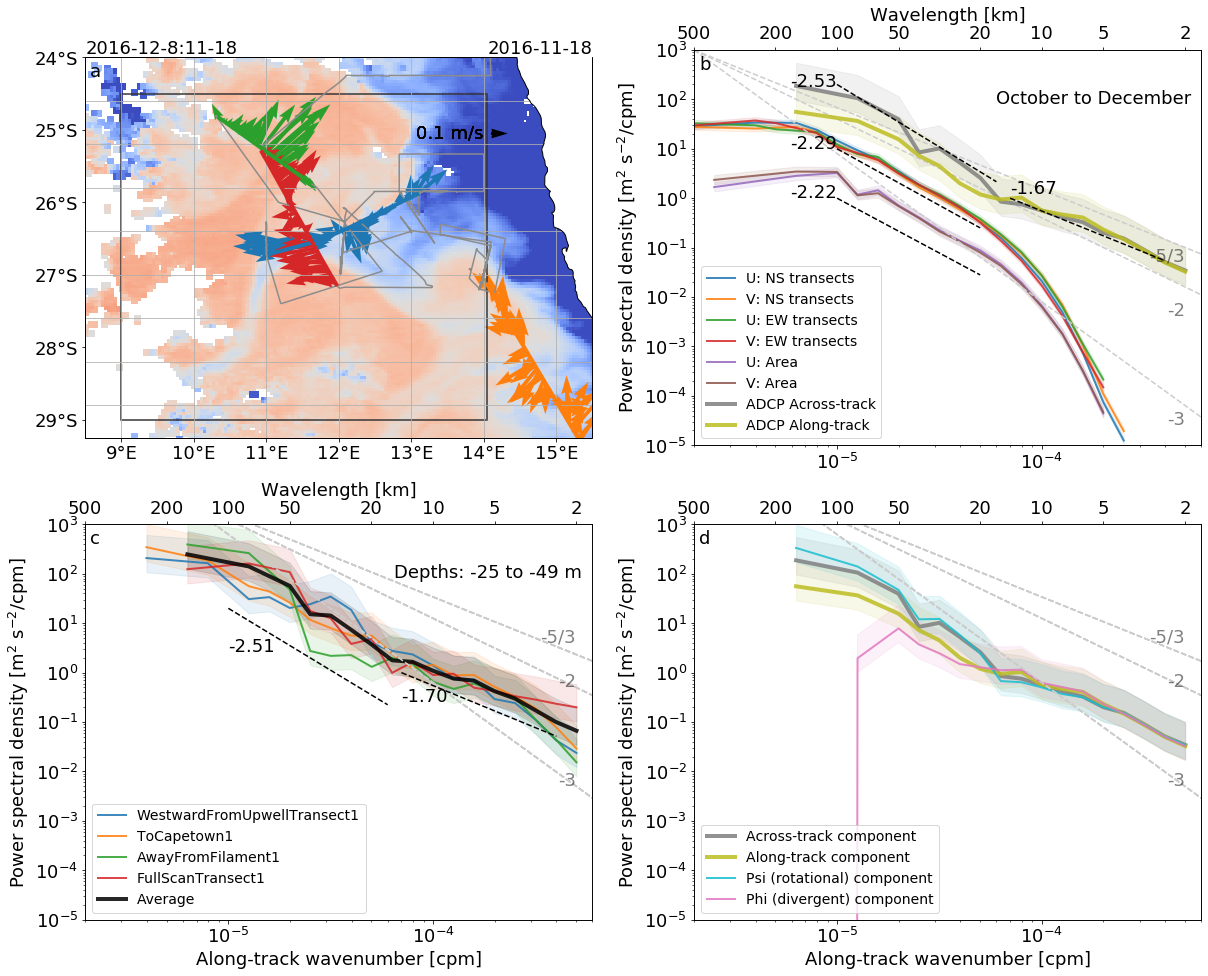

In [18]:
# plotting average spectra from ADCP
                                                                                 
nrows, ncols =  2,2
fig = plt.figure(figsize=(ncols*10.,nrows*8)) ## setting over-all figure size 
axs = [None]*nrows*ncols

# ==== SST map, ship track and transects
si = 0
projection = ccrs.PlateCarree()
lon_lat_lim = [8.5,15.5,-24.,-29.25]
axs[si] = plt.subplot(nrows, ncols, si+1, projection=projection)
axs[si] = fg.plot_map_view(sadcp=sadcp, scan_sadcp = scan_sadcp_transects_1km, topo=None,
                           sst_map=sst_map['sst_map_1118'], sst_map1=None, x_lim=[0,150],
                           axs=[axs[0],lon_lat_lim[0],lon_lat_lim[1],lon_lat_lim[2],lon_lat_lim[3]],projection = projection)
axs[si].gridlines()
axs[si].set_rasterized(True) # !! to reduce file size make this image, rest stays vectors

# area
slice_YC = np.array((-29.,-24.5))
slice_XC = np.array((9,14.04))
geom = geometry.box(minx=slice_XC.min(),maxx=slice_XC.max(),miny=slice_YC.min(),maxy=slice_YC.max())
axs[si].add_geometries([geom], crs=projection, alpha=0.75,edgecolor='0.2', facecolor='none', lw=2)

# ==== Model results for October - December
time_range = slice('2011-10-01T00','2011-12-31T23')
si = 1 
axs[si] = plt.subplot(nrows, ncols, si+1)
fg.psd_plot_mean(mitgcm_psd_xrft_NS_6hr.sel(time=time_range).mean(('time','XG')),'U','U: NS transects',axs[si],
                 mitgcm_psd_xrft_NS_6hr.freq_m.size,add_loglog_line=False)
fg.psd_plot_mean(mitgcm_psd_xrft_NS_6hr.sel(time=time_range).mean(('time','XC')),'V','V: NS transects',axs[si],
              mitgcm_psd_xrft_NS_6hr.freq_m.size,add_loglog_line=False)

fg.psd_plot_mean(mitgcm_psd_xrft_EW_6hr.sel(time=time_range).mean(('time','YC')),'U','U: EW transects',axs[si],
              mitgcm_psd_xrft_EW_6hr.freq_m.size,add_loglog_line=False)
fg.psd_plot_mean(mitgcm_psd_xrft_EW_6hr.sel(time=time_range).mean(('time','YG')),'V','V: EW transects',axs[si],
              mitgcm_psd_xrft_EW_6hr.freq_m.size,add_loglog_line=False)

fg.psd_plot_mean(mitgcm_psd_xrft_Area_6hr.sel(time=time_range).mean(('time')),'U','U: Area',axs[si],
                 mitgcm_psd_xrft_Area_6hr.freq_m.size,add_loglog_line=False)
fg.psd_plot_mean(mitgcm_psd_xrft_Area_6hr.sel(time=time_range).mean(('time')),'V','V: Area',axs[si],
                 mitgcm_psd_xrft_Area_6hr.freq_m.size,add_loglog_line=False)

axs[si].text(0.98,0.90,'October to December',transform=axs[si].transAxes,horizontalalignment='right', verticalalignment='top')

ylim = (1e-5,1e3) # axs[si].get_ylim()
xlim = (2e-6,6e-4) # axs[si].get_xlim()
axs[si].set_ylim(ylim)
axs[si].set_xlim(xlim)
slope_lim = np.array((1.0e-05, 5.0e-5))
m,mm,y4plot = sw.spectral_slope(mitgcm_psd_xrft_NS_6hr.sel(time=time_range).freq_m.values,
                             mitgcm_psd_xrft_NS_6hr.sel(time=time_range).V.mean(('time','XC')).values,
                      slope_lim[0],slope_lim[1],10)
axs[si].plot(slope_lim, y4plot,'--','lw',.5,label='_nolegend_',color='k')
axs[si].text(slope_lim[0],y4plot[0],'%.2f' % m,horizontalalignment='right')

slope_lim = np.array((1.0e-05, 5.0e-5))
m,mm,y4plot = sw.spectral_slope(mitgcm_psd_xrft_Area_6hr.sel(time=time_range).freq_m.values,
                             mitgcm_psd_xrft_Area_6hr.sel(time=time_range).V.mean(('time')).values,
                      slope_lim[0],slope_lim[1],1)
axs[si].plot(slope_lim, y4plot,'--','lw',.5,label='_nolegend_',color='k')
axs[si].text(slope_lim[0],y4plot[0],'%.2f' % m,horizontalalignment='right')

axs[si].text(5e-4,1e-1,'-5/3',alpha=0.5, verticalalignment='top',horizontalalignment='right')
axs[si].text(5e-4,8e-3,'-2',alpha=0.5, verticalalignment='top',horizontalalignment='right')
axs[si].text(5e-4,5e-5,'-3',alpha=0.5, verticalalignment='top',horizontalalignment='right')
sw.plot_loglog_slope(axs[si],np.array((-5/3,-2,-3)),xlim,ylim)

# add average across,along of ADCP
p = fg.psd_plot_mean(psd_xrft_all.mean(('z','transect')),'across','ADCP Across-track',
                     axs[si],psd_xrft_all.z.size,lcolor=plt.cm.tab10(0.7),add_loglog_line=False)
p[-1].set_linewidth(4)
p = fg.psd_plot_mean(psd_xrft_all.mean(('z','transect')),'along','ADCP Along-track',
                     axs[si],psd_xrft_all.z.size,lcolor=plt.cm.tab10(0.8),add_loglog_line=False)
p[-1].set_linewidth(4)

slope_lim = np.array((1.0e-05, 6.0e-5))
m,mm,y4plot = sw.spectral_slope(psd_xrft_all.freq_m.values,psd_xrft_all.across.mean(('z','transect')).values,
                      slope_lim[0],slope_lim[1],200)
axs[si].plot(slope_lim, y4plot,'--','lw',.5,label='_nolegend_',color='k')
axs[si].text(slope_lim[0],y4plot[0]+150,'%.2f' % m, verticalalignment='top',horizontalalignment='right')

slope_lim = np.array((7.0e-05, 4.0e-4))
m,mm,y4plot = sw.spectral_slope(psd_xrft_all.freq_m.values,psd_xrft_all.across.mean(('z','transect')).values,
                      slope_lim[0],slope_lim[1],1)
axs[si].plot(slope_lim, y4plot,'--','lw',.5,label='_nolegend_',color='k')
axs[si].text(slope_lim[0],y4plot[0],'%.2f' % m, verticalalignment='bottom',horizontalalignment='left')

axs[si].set_ylim(ylim)
axs[si].set_xlim(xlim)

sw.add_second_axis(axs[si])
axs[si].legend(loc='lower left') 
axs[si].set_xlabel('')


# === plot spectra of each transect
si = 2   
axs[si] = plt.subplot(nrows, ncols, si+1)
for key in psd_xrft_single:
    fg.psd_plot_mean(psd_xrft_single[key].mean(('z')),'ke',key,axs[si],psd_xrft_single[key].z.size)
# plot full mean including all transects    
p = fg.psd_plot_mean(psd_xrft_all.mean(('z','transect')),'ke','Average',axs[si],psd_xrft_all.z.size,lcolor='k')
p[-1].set_linewidth(4)
axs[si].legend(loc='lower left')
axs[si].text(0.98,0.90,('Depths: %i ' %scan_sadcp_transects_1km[key].z.sel(z=depth_range)[0] + 
                       'to %i m' %scan_sadcp_transects_1km[key].z.sel(z=depth_range)[-1]),
            transform=axs[si].transAxes,horizontalalignment='right', verticalalignment='top')

slope_lim = np.array((1.0e-05, 6.0e-5))
m,mm,y4plot = sw.spectral_slope(psd_xrft_all.freq_m.values,psd_xrft_all.ke.mean(('z','transect')).values,
                      slope_lim[0],slope_lim[1],20)
axs[si].plot(slope_lim, y4plot,'--','lw',.5,label='_nolegend_',color='k')
axs[si].text(slope_lim[0],y4plot[0]-15,'%.2f' % m, verticalalignment='top')

slope_lim = np.array((7.0e-05, 4.0e-4))
m,mm,y4plot = sw.spectral_slope(psd_xrft_all.freq_m.values,psd_xrft_all.ke.mean(('z','transect')).values,
                      slope_lim[0],slope_lim[1],1)
axs[si].plot(slope_lim, y4plot,'--','lw',.5,label='_nolegend_',color='k')
axs[si].text(slope_lim[0],y4plot[0]-0.5,'%.2f' % m, verticalalignment='top')

axs[si].text(5e-4,8e0,'-5/3',alpha=0.5, verticalalignment='top',horizontalalignment='right')
axs[si].text(5e-4,1e0,'-2',alpha=0.5, verticalalignment='top',horizontalalignment='right')
axs[si].text(5e-4,1e-2,'-3',alpha=0.5, verticalalignment='top',horizontalalignment='right')
axs[si].set_ylim(ylim)
axs[si].set_xlim(xlim)

sw.add_second_axis(axs[si])


# === decompose full mean and get helmholtz decomposition
si = 3
axs[si] = plt.subplot(nrows, ncols, si+1)
p = fg.psd_plot_mean(psd_xrft_all.mean(('z','transect')),'across','Across-track component',axs[si],psd_xrft_all.z.size,lcolor=plt.cm.tab10(0.7))
p[-1].set_linewidth(4)
p = fg.psd_plot_mean(psd_xrft_all.mean(('z','transect')),'along','Along-track component',axs[si],psd_xrft_all.z.size,lcolor=plt.cm.tab10(0.8))
p[-1].set_linewidth(4)
p = fg.psd_plot_mean(psd_xrft_all,'psi_rot','Psi (rotational) component',axs[si],psd_xrft_all.z.size,lcolor=plt.cm.tab10(0.9))
p[-1].set_linewidth(2)
p = fg.psd_plot_mean(psd_xrft_all,'phi_div','Phi (divergent) component',axs[si],psd_xrft_all.z.size,lcolor=plt.cm.tab10(0.6))
p[-1].set_linewidth(2)
axs[si].legend(loc='lower left')
axs[si].set_ylim(ylim)
axs[si].set_xlim(xlim)
axs[si].text(5e-4,8e0,'-5/3',alpha=0.5, verticalalignment='top',horizontalalignment='right')
axs[si].text(5e-4,1e0,'-2',alpha=0.5, verticalalignment='top',horizontalalignment='right')
axs[si].text(5e-4,1e-2,'-3',alpha=0.5, verticalalignment='top',horizontalalignment='right')

fg.label_axes(fig,loc=(0.01,0.95),labels=np.array(('a','b','','c','','d','','','','','','')))
ax2=sw.add_second_axis(axs[si])
ax2.set_xlabel('')

figname = figure_dir+'Figure_ADCP_and_Model_Spectra_XRFT.pdf'
fig.savefig(figname, orientation='landscape',bbox_inches='tight')


### Rossby radius of deformation from Chelton et al. 1998

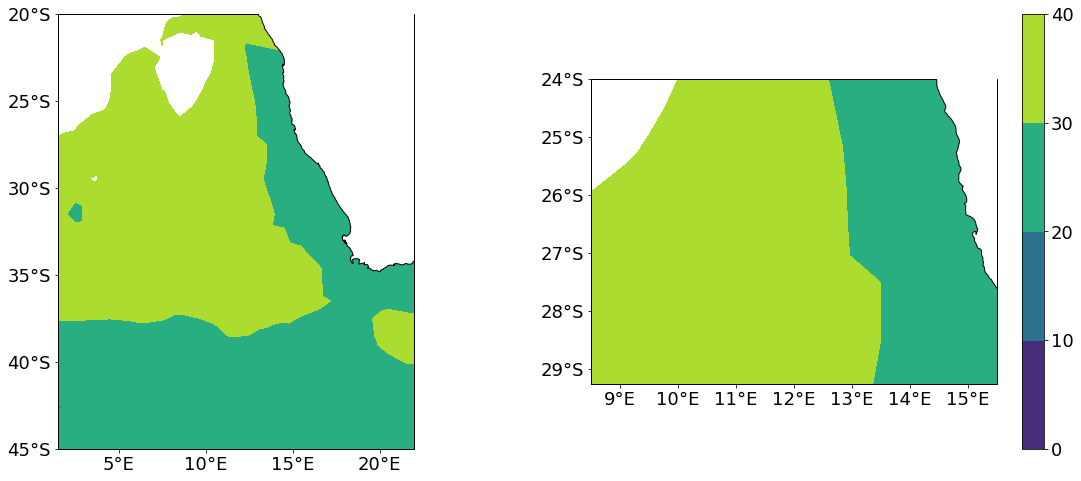

In [21]:
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from http://www-po.coas.oregonstate.edu/research/po/research/rossby_radius/
# latitude in degrees from -75.5 to 89.5 (negative for southern hemisphere)
# longitude in degrees east from 0.5 to 359.5
# baroclinic gravity-wave phase speed c in m/s
# baroclinic Rossby radius of deformation r in km.
filename = '/Users/North/Drive/Work/UniH_Work/DataAnalysis/jlab_files/Benguela/netcdf_files/rossrad.dat'
ross_dat = pd.read_csv(filename, sep=' ',skipinitialspace=True, names = ('latitude','longitude','gravity_wave_speed','baro_Ro_radius'))

nrows, ncols = 1,2
fig = plt.figure(figsize=(ncols*10.,nrows*8)) ## setting over-all figure size 
axs = [None]*nrows*ncols
projection = ccrs.PlateCarree()
axs = plt.subplot(nrows, ncols, 1, projection=projection)

dataset = cfeature.NaturalEarthFeature(category='physical',
                                       name='land',
                                       scale='10m')
axs.add_feature(dataset, zorder=100, edgecolor='k', facecolor = 'w')

h=axs.tricontourf(ross_dat['longitude'],ross_dat['latitude'],ross_dat['baro_Ro_radius'],np.arange(0,50,10),transform=projection)
# setup ticks
axs.set_xticks([5,10,15,20,25], crs=projection)
axs.set_yticks(np.arange(-45,-15,5), crs=projection)
lon_formatter = LongitudeFormatter(number_format='.0f',
                                   dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f')
axs.xaxis.set_major_formatter(lon_formatter)
axs.yaxis.set_major_formatter(lat_formatter)
# set axis limits
lon_lat_lim = [1.5,22,-20.,-45]
axs.set_extent(lon_lat_lim, projection)

# zoom
axs = plt.subplot(nrows, ncols, 2, projection=projection)
axs.add_feature(dataset, zorder=100, edgecolor='k', facecolor = 'w')
h=axs.tricontourf(ross_dat['longitude'],ross_dat['latitude'],ross_dat['baro_Ro_radius'],np.arange(0,50,10),transform=projection)
# setup ticks
axs.set_xticks([8,9,10,11,12,13,14,15,16,17], crs=projection)
axs.set_yticks([-22, -23, -24, -25, -26, -27, -28, -29], crs=projection)
lon_formatter = LongitudeFormatter(number_format='.0f',
                                   dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.0f')
axs.xaxis.set_major_formatter(lon_formatter)
axs.yaxis.set_major_formatter(lat_formatter)
# set axis limits
lon_lat_lim = [8.5,15.5,-24.,-29.25]
axs.set_extent(lon_lat_lim, projection)
plt.colorbar(h)
